In [10]:
from scipy.io import loadmat
import numpy as np


In [11]:
import matplotlib.pyplot as plt
eig_number=4  # Número de eigenvalor (1, 4)
# Cargar los datos para diferentes N y el mismo eig_number
Ns = [2, 3, 4]
eig = eig_number - 1  # mismo eig_number que antes

loaded_data = {}
for N_val in Ns:

    
    mat = loadmat(f'data_quadratic_N{N_val}_eig{eig}.mat')
    sigma = mat[f'sigma_sweep_quadratic_N{N_val}_eig{eig}'].squeeze()
    rel_error = mat[f'rel_error_total_quadratic_N{N_val}_eig{eig}'].squeeze()
    loaded_data[N_val] = {'sigma': sigma, 'rel_error': rel_error}

In [12]:
# Definir colores manualmente (puedes elegir otros o usar un colormap como plt.cm.tab10)
colors = ['tab:green', 'tab:orange', 'tab:blue']  # uno por eig

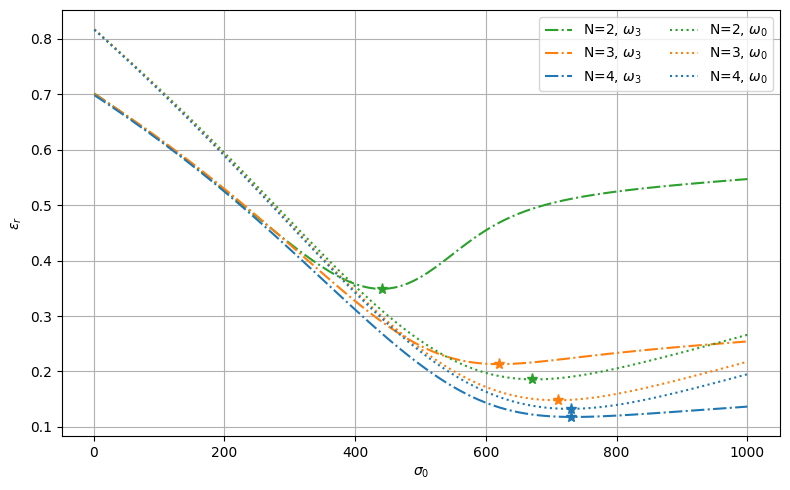

In [13]:
plt.figure(figsize=(8, 5))
for idx, N_val in enumerate(loaded_data.keys()):
    sigma = loaded_data[N_val]['sigma']
    rel_error = loaded_data[N_val]['rel_error']
    plt.plot(sigma, rel_error, label=f'N={N_val}, $\omega_{eig}$', color=colors[idx % len(colors)], linestyle='-.')
    min_idx = np.argmin(rel_error)
    plt.plot(sigma[min_idx], rel_error[min_idx], '*', color=colors[idx % len(colors)], markersize=8)

eig=0

for N_val in Ns:
    mat = loadmat(f'data_quadratic_N{N_val}_eig{eig}.mat')
    sigma = mat[f'sigma_sweep_quadratic_N{N_val}_eig{eig}'].squeeze()
    rel_error = mat[f'rel_error_total_quadratic_N{N_val}_eig{eig}'].squeeze()
    loaded_data[N_val] = {'sigma': sigma, 'rel_error': rel_error}
for idx, N_val in enumerate(loaded_data.keys()):
    sigma = loaded_data[N_val]['sigma']
    rel_error = loaded_data[N_val]['rel_error']
    plt.plot(sigma, rel_error, label=f'N={N_val}, $\omega_{eig}$', color=colors[idx % len(colors)], linestyle='dotted')
    min_idx = np.argmin(rel_error)
    plt.plot(sigma[min_idx], rel_error[min_idx], '*', color=colors[idx % len(colors)], markersize=8)

plt.xlabel('$\sigma_0$')
plt.ylabel(r'$\epsilon_r$')
plt.grid(True)
plt.legend(ncol=2)
plt.tight_layout()
plt.show()